In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def get_material_law(eps_v_Emn, eps_d_Emna, E, nu, kappa_0, alpha, beta):
    
    K = E / (1. -2. * nu)
    G = E / 2.*(1 + nu)
    eps_d_inner = np.einsum('...n,...n->...',eps_d_Emna,eps_d_Emna)
    
    Y = 0.5 * K * eps_v_Emn**2. + G * eps_d_inner
    
    kappa = np.sqrt(2. * Y)
        
    if kappa > kappa_0:
               
        d = 1. - kappa_0 / kappa * (1. - alpha + alpha * np.exp(beta*(kappa_0 - kappa)))
     
        sigma_d_Emna = K * (eps_d_Emna) * (1. - d)

        sigma_v_Emn = 2* G * (eps_v_Emn) * (1. - d)           

    else:
        kappa = kappa_0
        
        d = 1. - kappa_0 / kappa * (1. - alpha + alpha * np.exp(beta*(kappa_0 - kappa)))
        
        sigma_d_Emna = K * (eps_d_Emna )

        sigma_v_Emn = 2* G * (eps_v_Emn )
            
            
    return sigma_d_Emna, sigma_v_Emn, d 

In [3]:
eps_1 = np.linspace(0,-0.0033,1000)
eps = np.zeros((len(eps_1),3,3))
I = eps[:] +  np.eye(3,like=eps)
eps[:,0,0] = eps_1
eps[:,1,1] = -0.18 * eps_1
eps[:,2,2] = -0.18 * eps_1
eps_v_Emn = (eps[:,0,0] + eps[:,1,1] + eps[:,2,2])/3 
eps_d = eps -  np.einsum('nij, n -> nij', I, eps_v_Emn)
n = np.array([1,1,1]/np.sqrt(3))
eps_d_Emna = np.einsum('...nij, ...j -> ni',eps_d, n)

<IPython.core.display.Javascript object>


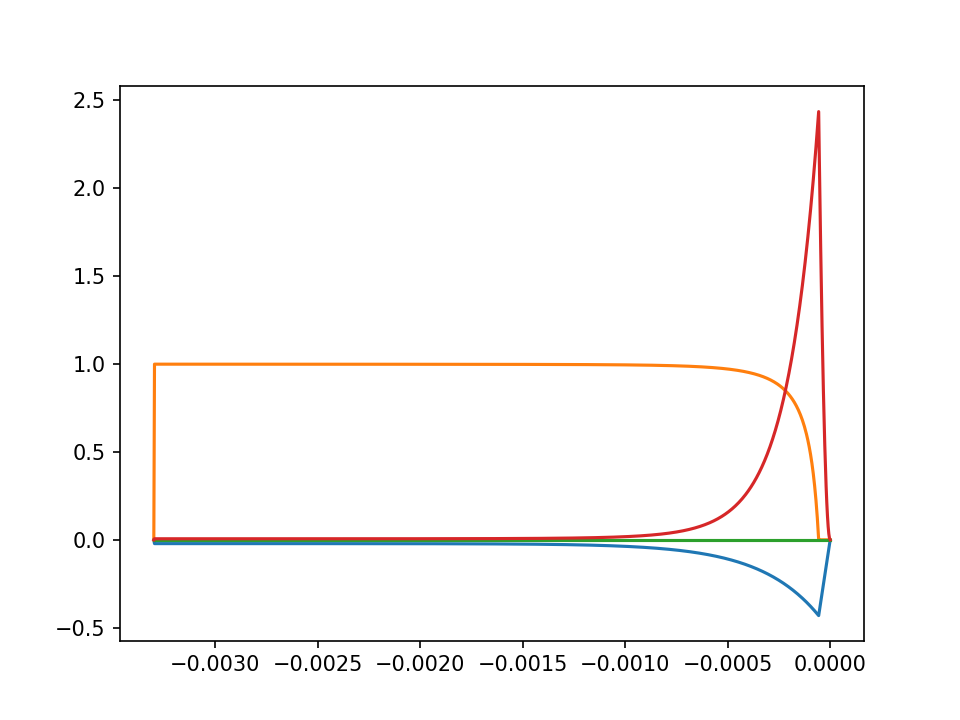

In [4]:
E = 30000
nu = 0.2
kappa_0 = 0.0065
alpha = 0.95
beta = 30. 

sigma_v_Emn = np.zeros_like(eps_v_Emn)
omega_Emn = np.zeros_like(eps_v_Emn)
kappa_Emn = np.zeros_like(eps_v_Emn)
sigma_d_Emna = np.zeros_like(eps_d_Emna)

for i in range(1,len(eps_1)-1):
    sigma_d_Emna[i],sigma_v_Emn[i], omega_Emn[i] = get_material_law(eps_v_Emn[i], eps_d_Emna[i],E, nu, kappa_0, alpha, beta)
    
plt.plot(eps_1,sigma_v_Emn)
plt.show()

In [5]:
plt.plot(eps_1,omega_Emn)
plt.show()

In [6]:
eps_d_inner = np.abs(np.einsum('...n,...n->...',eps_d_Emna,eps_d_Emna))
plt.plot(eps_1,eps_d_inner)
plt.show()

In [7]:
sigma_d_inner = np.abs(np.einsum('...n,...n->...',sigma_d_Emna,sigma_d_Emna))
plt.plot(eps_1,sigma_d_inner)
plt.show()